[*********************100%***********************]  1 of 1 completed


Current Stock Price: 437.5

===== TOP GAMMA ZONES =====
    strike  gamma_score
59   430.0      76778.0
63   440.0      44166.0
65   445.0      35621.0
67   450.0      32555.0
61   435.0      24033.0


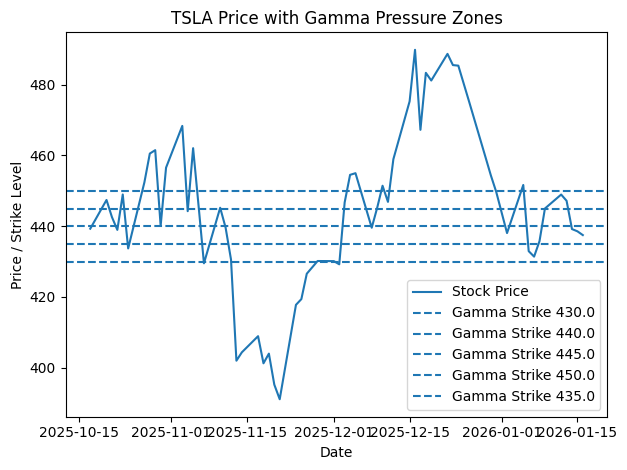

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# CONFIG
# =========================
stock_symbol = "TSLA"
ticker = yf.Ticker(stock_symbol)

# =========================
# PRICE DATA
# =========================
price_data = yf.download(stock_symbol, period="3mo")

# Fix multi-index columns if any
if isinstance(price_data.columns, pd.MultiIndex):
    price_data.columns = price_data.columns.get_level_values(0)

# =========================
# OPTION DATA
# =========================
expiry = ticker.options[0]
option_chain = ticker.option_chain(expiry)
calls = option_chain.calls
calls['volume'] = calls['volume'].fillna(0)

current_price = price_data['Close'].iloc[-1]
print("Current Stock Price:", current_price)

# =========================
# ATM FILTER
# =========================
atm_calls = calls[
    (calls['strike'] >= current_price - 50) &
    (calls['strike'] <= current_price + 50)
].copy()

atm_calls['gamma_score'] = atm_calls['volume'] * (atm_calls['openInterest'] + 1)

top_gamma = atm_calls.sort_values(by='gamma_score', ascending=False).head(5)

print("\n===== TOP GAMMA ZONES =====")
print(top_gamma[['strike', 'gamma_score']])

# =========================
# VISUALIZATION
# =========================
plt.figure()

# Price line
plt.plot(price_data.index, price_data['Close'], label="Stock Price")

# Gamma zones as horizontal lines
for _, row in top_gamma.iterrows():
    plt.axhline(
        y=row['strike'],
        linestyle='--',
        label=f"Gamma Strike {row['strike']}"
    )

plt.xlabel("Date")
plt.ylabel("Price / Strike Level")
plt.title(f"{stock_symbol} Price with Gamma Pressure Zones")
plt.legend()
plt.tight_layout()
plt.show()
